# Fraud detection in Credit Card Transactions data

 - Credit Card transaction frauds is an increasing problem. 
 - Fraud comes from various forms and different scales, from many entities like merchant fraud, customer being the fraudster or a chain being compromised and the list goes on. 
 - Fraud detection in credit card transactions data is essential for consumer banks or the credit card company, to help in preventing fraud loss, saving millions of dollars. 
 - In this analysis, we will be using publicly accessible [dataset](https://github.com/CapitalOneRecruiting/DS) of credit card transactions provided by Capital One company, for exploratory data analysis and to build predictive models for flagging a transaction as fraud or non fraud. Dataset has a target variable indicating whether a transaction is a fraud or not fraud.
 - The features in the data set include transaction details, account details, merchant details like expenditure category, card details, card usage type, location data, etc.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading Dataset

In [2]:
# Loading the csv file into pandas dataframe
df = pd.read_csv("https://media.githubusercontent.com/media/Morris135212/DataSet/main/transaction/transaction.csv", 
                 index_col=0)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


### Data Insights

In [3]:
#Shape of the dataset
print("Number of records in the dataset: ", df.shape[0])
print("Number of fields in the dataset: ", df.shape[1])

Number of records in the dataset:  786363
Number of fields in the dataset:  29


In [4]:
fraud_count = (df['isFraud'].values == True).sum()
non_fraud_count = (df['isFraud'].values == False).sum()
fraud_rate = round(float(fraud_count*100/df.shape[0]),2)

print("Fraud event rate: ", fraud_rate, "%")

total_transaction_amount = round(df['transactionAmount'].sum(),2)
total_fraud_transaction_amount = round(df[df['isFraud'] ==True]['transactionAmount'].sum(),2)
fraud_amount_rate=round(total_fraud_transaction_amount*100/total_transaction_amount,2)

print("Fraud amount rate: ", fraud_amount_rate, "%")

Fraud event rate:  1.58 %
Fraud amount rate:  2.6 %


 - We see that about 1.6% of the transactions are fraud events, which is a high fraud rate. 
 - Amount of money involved involved in fraud transactions is 2.6% of the total amount of trasactions.


### Missing Value Stats

In [5]:
# percentage of missing values in each column
missing_stats = df.isna().sum()*100/len(df)
missing_stats

accountNumber                 0.000000
customerId                    0.000000
creditLimit                   0.000000
availableMoney                0.000000
transactionDateTime           0.000000
transactionAmount             0.000000
merchantName                  0.000000
acqCountry                    0.580139
merchantCountryCode           0.092069
posEntryMode                  0.515538
posConditionCode              0.052012
merchantCategoryCode          0.000000
currentExpDate                0.000000
accountOpenDate               0.000000
dateOfLastAddressChange       0.000000
cardCVV                       0.000000
enteredCVV                    0.000000
cardLast4Digits               0.000000
transactionType               0.088763
echoBuffer                  100.000000
currentBalance                0.000000
merchantCity                100.000000
merchantState               100.000000
merchantZip                 100.000000
cardPresent                   0.000000
posOnPremises            

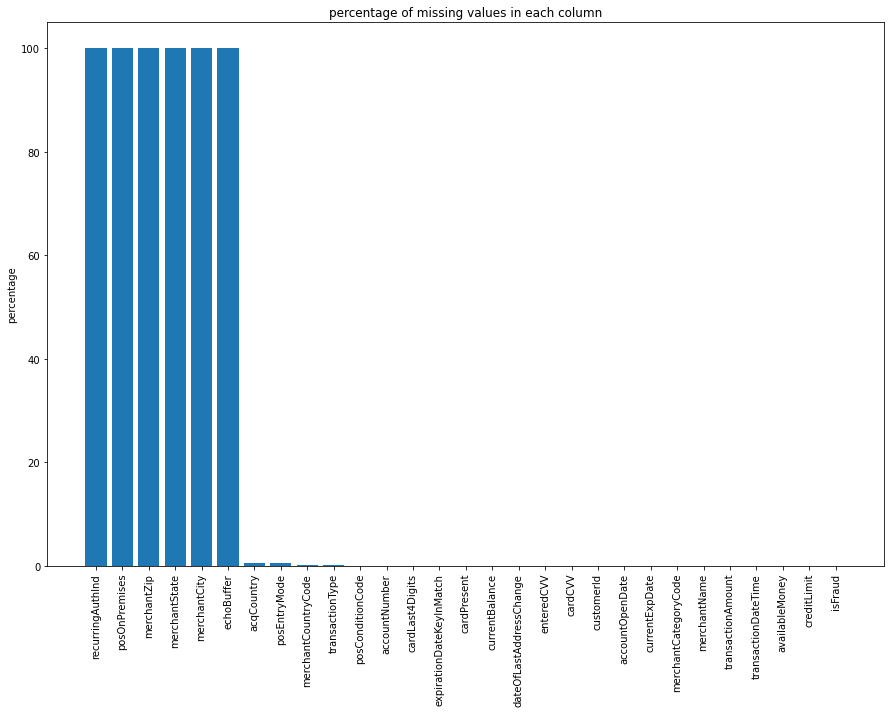

In [6]:
column_names = list(missing_stats.index)
fig = plt.figure(figsize = (15,10))
temp = {'column_names': column_names, 'percent_missing': list(missing_stats.values)}
temp_df = pd.DataFrame(data = temp)
temp_df = temp_df.sort_values(by = ['percent_missing'], ascending = False, ignore_index = True)
plt.bar(temp_df['column_names'], temp_df['percent_missing'])
plt.tick_params(axis = 'x', rotation = 90)
plt.ylabel('percentage')
plt.title('percentage of missing values in each column');

 - We would completely remove the columns 'recurringAuthInd', 'posOnPremises', 'merchantZip', 'merchantState', 'merchantCity' and 'echoBuffer' which have 100% of the values missing

In [7]:
df = df.drop(columns=['recurringAuthInd', 
                      'posOnPremises', 
                      'merchantZip', 
                      'merchantState', 
                      'merchantCity', 
                      'echoBuffer'])

### Data Visualizations

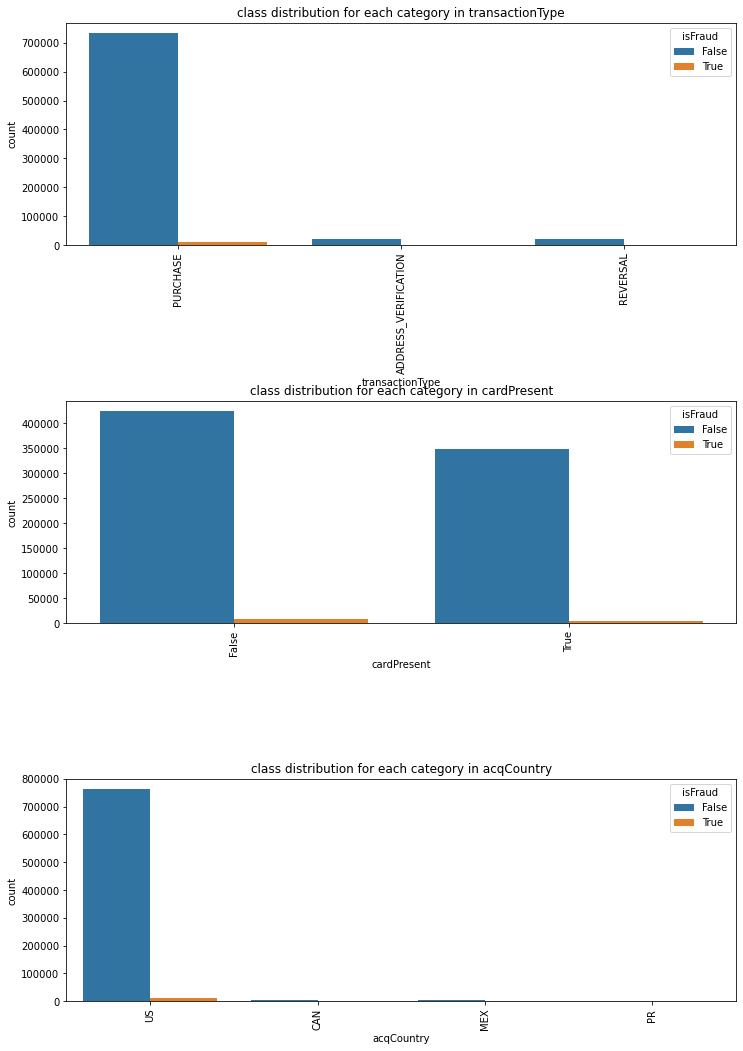

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(12,18))
plt.subplots_adjust(hspace = 0.7)
categor_features = ['transactionType', 'cardPresent', 'acqCountry']
for feature, subplot in zip(categor_features, ax.flatten()):
    sns.countplot(x = feature, hue = "isFraud", data = df, ax = subplot)
    subplot.tick_params(axis = 'x', rotation = 90)
    subplot.set_title('class distribution for each category in ' + feature);

#### Fraud rate analysis w.r.t different features

In [9]:
df.posEntryMode.unique()

array([ 2.,  9.,  5., 80., 90., nan])

In [10]:
df['posEntryMode'] = df['posEntryMode'].astype("string")
df['posEntryMode'] = df['posEntryMode'].fillna('UNK')
df.posEntryMode.unique()

<StringArray>
['2.0', '9.0', '5.0', '80.0', '90.0', 'UNK']
Length: 6, dtype: string

In [11]:
df.posConditionCode.unique()

array([ 1.,  8., 99., nan])

In [12]:
df['posConditionCode'] = df['posConditionCode'].astype("string")
df['posConditionCode'] = df['posConditionCode'].fillna('UNK')
df.posConditionCode.unique()

<StringArray>
['1.0', '8.0', '99.0', 'UNK']
Length: 4, dtype: string

In [13]:
def calculate_fraud_rate_categorical_variable(data,col):
    fraud_df = data[data['isFraud']==True].groupby(col,as_index=False)\
        .agg(fraud_transactionAmount_sum=('transactionAmount','sum'),
             fraud_num_transactions=('transactionAmount','size'),
             )
    total_df=data.groupby(col,as_index=False)\
        .agg(total_transactionAmount_sum=('transactionAmount','sum'),
             total_num_transactions=('transactionAmount','size'),
             )
    final_df=pd.merge(fraud_df,total_df,on=col)
    final_df['fraud_rate']=final_df['fraud_num_transactions']*100/final_df['total_num_transactions']
    final_df['fraud_amount_rate']=final_df['fraud_transactionAmount_sum']*100/final_df['total_transactionAmount_sum']
    return final_df

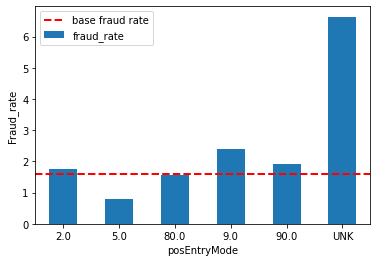

In [14]:
col = 'posEntryMode'
base_fraud_rate = 1.58
data = calculate_fraud_rate_categorical_variable(df,col)
ax = data.plot.bar(x=col, y='fraud_rate', rot=0)
ax.axhline(y=base_fraud_rate, color='r', linestyle='--', lw=2, label = 'base fraud rate')
ax.set_xlabel(col)
ax.set_ylabel("Fraud_rate")
plt.legend();

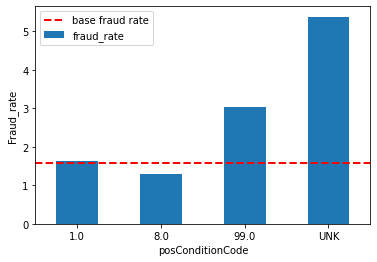

In [15]:
col = 'posConditionCode'
base_fraud_rate = 1.58
data = calculate_fraud_rate_categorical_variable(df,col)
ax = data.plot.bar(x=col, y='fraud_rate', rot=0)
ax.axhline(y=base_fraud_rate, color='r', linestyle='--', lw=2, label = 'base fraud rate')
ax.set_xlabel(col)
ax.set_ylabel("Fraud_rate")
plt.legend();

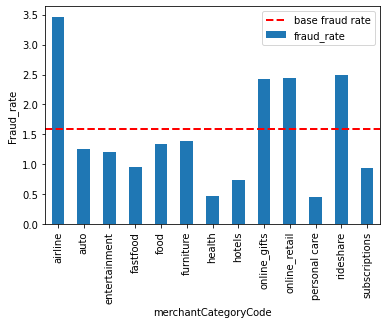

In [16]:
col = 'merchantCategoryCode'
base_fraud_rate = 1.58
data = calculate_fraud_rate_categorical_variable(df,col)
ax = data.plot.bar(x=col, y='fraud_rate', rot=90)
ax.axhline(y=base_fraud_rate, color='r', linestyle='--', lw=2, label = 'base fraud rate')
ax.set_xlabel(col)
ax.set_ylabel("Fraud_rate")
plt.legend();

In [17]:
def num_digits_mismatching_cvv(cardCVV,enteredCVV):
    num_mismatch=0
    cardCVV=str(cardCVV)
    enteredCVV=str(enteredCVV)
    if len(cardCVV)==len(enteredCVV):
        for i in range(len(cardCVV)):
            if cardCVV[i]!=enteredCVV[i]:
                num_mismatch+=1
    return num_mismatch

In [18]:
df['cvv_mismatch_digits'] = df.apply(lambda x: num_digits_mismatching_cvv(x.cardCVV, x.enteredCVV), axis=1)

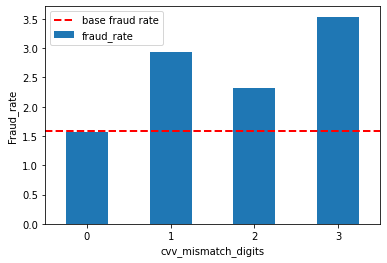

In [19]:
col = 'cvv_mismatch_digits'
base_fraud_rate = 1.58
data = calculate_fraud_rate_categorical_variable(df,col)
ax = data.plot.bar(x=col, y='fraud_rate', rot=0)
ax.axhline(y=base_fraud_rate, color='r', linestyle='--', lw=2, label = 'base fraud rate')
ax.set_xlabel(col)
ax.set_ylabel("Fraud_rate")
plt.legend();